# E1 316-O Deep learning for robotics HW 2

## Name : *Swapnil Trivedi* 
## SR : *13-19-01-19-52-24-1-24723*
## Department : *Artificial Intelligence*

In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install keras
# !pip install tensorflow

## Q0

In [2]:
# handle imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split



2025-06-01 17:20:48.015407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# check if the Xi is in unit circle
def is_in_unit_circle(x):
    #X will be a tuple
    x1,x2=x
    return x1**2 + x2**2 < 1

# generate training data

def generate_dataset(num_points=1000, lower=-1.5, upper=1.5, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Sample uniformly from the square [-1.5, 1.5] x [-1.5, 1.5]
    X = np.random.uniform(low=lower, high=upper, size=(num_points, 2))

    # Apply unit_circle_label to each point
    y = np.array([is_in_unit_circle(xi) for xi in X])

    return X, y

def binary_cross_entropy(y_true, y_pred, epsilon=1e-12):

    # squish predictions to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute binary cross-entropy
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    return loss


In [4]:
# Generate the full dataset
X, y = generate_dataset(num_points=10000, seed=42)

# Use sklearn's utility to split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42, shuffle=True
)
# print("First 5 samples (X):", X[:5])
# print("First 5 labels (y):", y[:5])


In [5]:
# Build the neural network
model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(2,)),  # Hidden layer 1
    Dense(1, activation='sigmoid')                      # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

/mnt/c/Users/swapn/Downloads/DLR-HW-2/gym-hw-2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6396 - loss: 0.6510
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.6335
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6676 - loss: 0.5708
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.4402
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.3187
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.2467
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9601 - loss: 0.1952
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9567 - loss: 0.1713
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.1541
Epoch 10/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.1344
Epoch 11/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.1264
Epoch 12/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Available history keys: dict_keys(['accuracy', 'loss'])


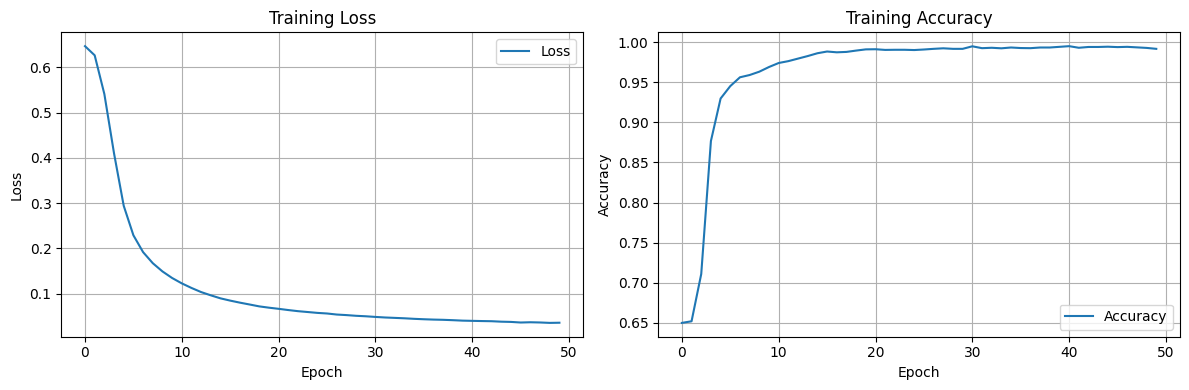

In [6]:
print("Available history keys:", history.history.keys())

loss = history.history.get('loss', [])
acc = history.history.get('accuracy', [])

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(loss, label='Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(acc, label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Get predicted probabilities
y_pred_probs = model.predict(X_test).flatten()

# Convert probabilities to binary class predictions
y_pred_classes = (y_pred_probs > 0.5).astype(int)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Test Loss: 0.0310, Test Accuracy: 0.9948


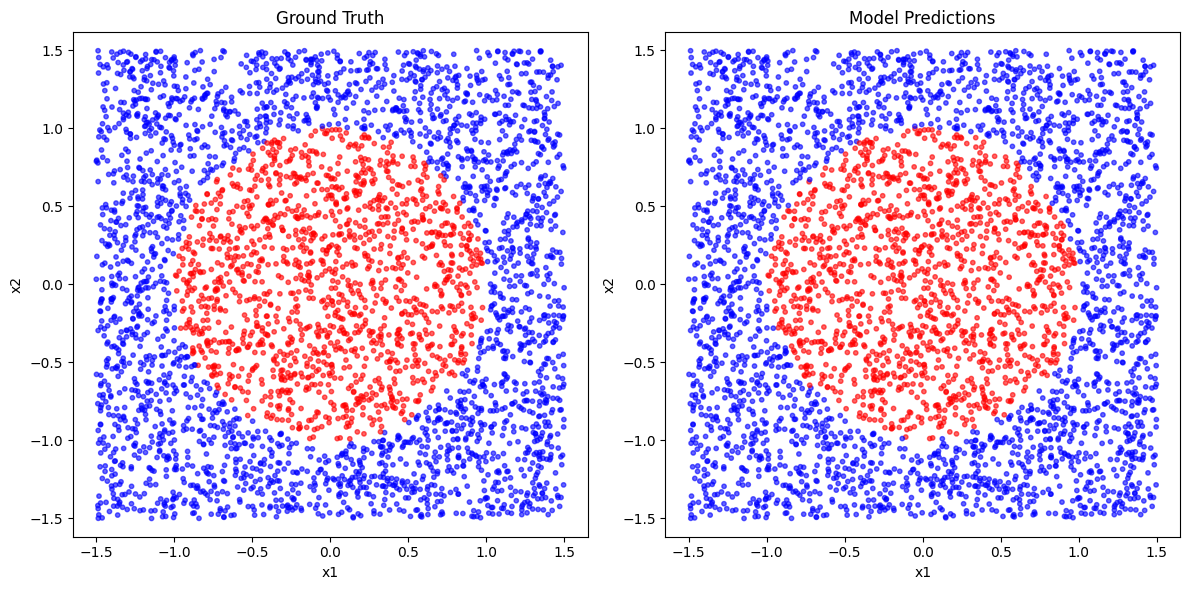

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Actual labels
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', s=10, alpha=0.6)
axs[0].set_title("Ground Truth")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
axs[0].axis('equal')

# Predicted labels
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_classes, cmap='bwr', s=10, alpha=0.6)
axs[1].set_title("Model Predictions")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
axs[1].axis('equal')

plt.tight_layout()
plt.show()